# Image Smoothing (Image Blurring)

In [2]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

## Image Filtering

- 이미지도 음성 신호처럼 주파수로 표현할 수 있음

- 일반적으로 고주파는 밝기의 변화가 많은 곳, 즉 경계선 영역에서 나타나며, 일반적인 배경은 저주파로 나타냄 

  - 이것을 바탕으로 고주파를 제거하면 Blur처리가 되며, 저주파를 제거하면 대상의 영역을 확인 가능

- Low-pass filter(LPF)와 High-pass filter(HPF)를 이용하여,  
  LPF를 적용하면 노이즈제거나 blur처리를 할 수 있으며, HPF를 적용하면 경계선을 찾을 수 있음

- `cv2.filter2D()`
  - 일반적으로 많이 사용되는 필터

  - ex) $K = \frac{1}{25} \begin{vmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\  1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{vmatrix}$

![](https://cdn.pixabay.com/photo/2020/10/01/09/35/bee-5618012_960_720.jpg)

  <sub>[이미지 출처] https://pixabay.com/photos/bee-insect-flower-honey-bee-5618012/</sub>

## Image Blurring
- low-pass filter를 이미지에 적용하여 얻을 수 있음

- 고주파영역을 제거함으로써 노이즈를 제거하거나 경계선을 흐리게 할 수 있음

- OpenCV에서 제공하는 blurring 방법
  - `Averaging`

  - `Gaussian Filtering`

  - `Median Filtering`

  - `Bilateral Filtering`

In [4]:
up = files.upload()

Saving bee.jpg to bee.jpg


In [5]:
img = cv2.imread('bee.jpg')[:,:,::-1]
img.shape

(427, 640, 3)

In [15]:
# Low-pass filter
kernel = np.ones((5,5), np.float32) / 25.
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

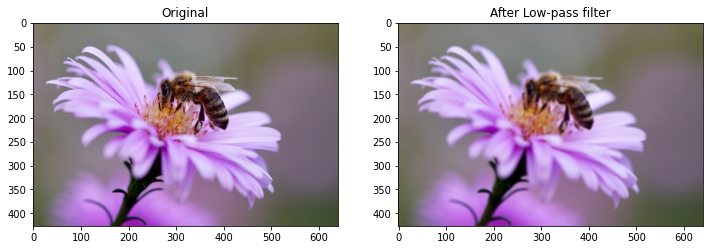

In [16]:
dst = cv2.filter2D(img, -1, kernel)
plt.figure(figsize=(12,5))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(dst), plt.title('After Low-pass filter')
plt.show()

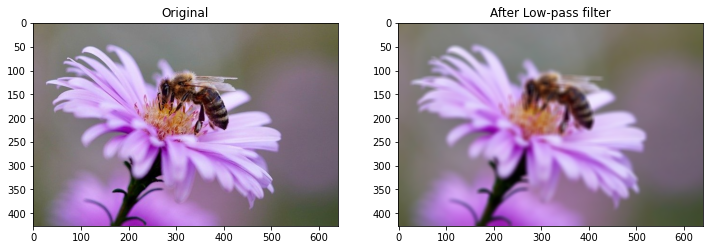

In [17]:
kernel = np.ones((9,9), np.float32) / 81.
dst = cv2.filter2D(img, -1, kernel)
plt.figure(figsize=(12,5))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(dst), plt.title('After Low-pass filter')
plt.show()

### Averaging
- Box형태의 kernel을 이미지에 적용한 후 평균값을 box의 중심점에 적용하는 형태

- `cv2.blur()` 또는 `cv2.boxFilter()` 

- `cv2.blur()`
  - Parameters	
    - `src` : Chennel수는 상관없으나,  
        depth(Data Type)은 CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.

    - `ksize` : kernel 사이즈(ex; (3,3))

  - ex)  $\ K = \frac{1}{9} \begin{vmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\  1 & 1 & 1 \end{vmatrix}$

<br>

- 이미지의 Data Type
  - `CV_8U` : 8-bit unsigned integer: uchar ( 0..255 )

  - `CV_8S` : 8-bit signed integer: schar ( -128..127 )

  - `CV_16U` : 16-bit unsigned integer: ushort ( 0..65535 )

  - `CV_16S` : 16-bit signed integer: short ( -32768..32767 )

  - `CV_32S` : 32-bit signed integer: int ( -2147483648..2147483647 )

  - `CV_32F` : 32-bit floating-point number: float ( -FLT_MAX..FLT_MAX, INF, NAN )

  - `CV_64F` : 64-bit floating-point number: double ( -DBL_MAX..DBL_MAX, INF, NAN )

  - 일반적으로 Data Type과 채널수가 같이 표현이 되어 CV_8UC1 과 같이 표현  
    (8bit unsiged integer이면서 채널이 1개)

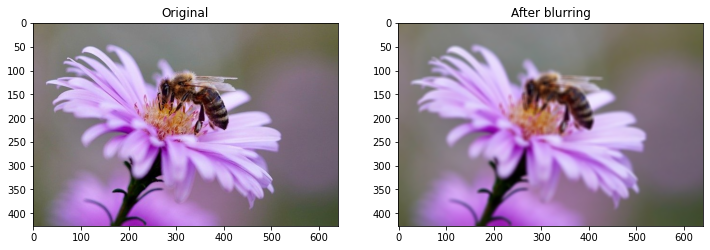

In [18]:
dst1 = cv2.blur(img, ksize=(7,7))
plt.figure(figsize=(12,5))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(dst1), plt.title('After blurring')
plt.show()

### Gaussian Filtering

- box filter는 동일한 값으로 구성된 kernel을 사용하지만, Gaussian Filter는 Gaussian함수를 이용한 Kernel을 적용
  
  - kernel 행렬의 값을 Gaussian 함수를 통해서 수학적으로 생성하여 적용

- kernel의 사이즈는 양수이면서 홀수로 지정을 해야 됨

- 이미지의 Gaussian Noise (전체적으로 밀도가 동일한 노이즈, 백색노이즈)를 제거하는 데 가장 효과적

- `cv2.GaussianBlur()`

  - Parameters  
    - `img` : Chennel수는 상관없으나, depth(Data Type)은 CV_8U, CV_16U, CV_16S, CV_32F or CV_64F

    - `ksize` : (width, height) 형태의 kernel size.  
      width와 height는 서로 다를 수 있지만, 양수의 홀수로 지정해야 함

    - `sigmaX` : Gaussian kernel standard deviation in X direction.

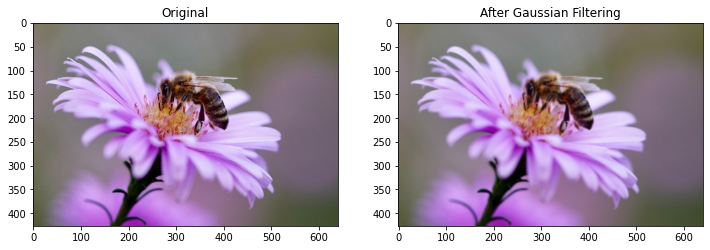

In [21]:
dst2 = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=0)
plt.figure(figsize=(12,5))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(dst2), plt.title('After Gaussian Filtering')
plt.show()

### Median Filtering
- kernel window와 pixel의 값들을 정렬한 후에 중간값을 선택하여 적용

- salt-and-pepper noise(점잡음: 무작위적인 희고 검은 점이 나타남) 제거에 가장 효과적

- `cv2.medianBlur()`
  
  - Parameters	
    - `src` : 1, 3, 4 channel image  
      depth가 CV_8U, CV_16U, or CV_32F 이면 ksize는 3또는5, CV_8U이면 더 큰 ksize가능
    
    - `ksize` : 1보다 큰 홀수



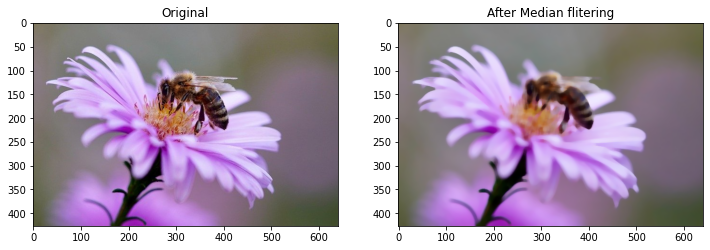

In [24]:
dst3 = cv2.medianBlur(img, ksize=9)
plt.figure(figsize=(12,5))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(dst3), plt.title('After Median flitering')
plt.show()

### Bilateral Filtering
- 위 3가지 Blur 방식은 경계선까지 Blur 처리가 되어, 경계선이 흐려지게 됨

-  Bilateral Filtering(양방향 필터)은 경계선을 유지하면서 Gaussian Blur처리를 해주는 방법

- `cv2.bilateralFilter()`

  - Parameters
    - `src` : 8-bit, 1 or 3 Channel image
    - `d` : filtering시 고려할 주변 pixel 지름
    
    - `sigmaColor` : Color를 고려할 공간. 숫자가 크면 멀리 있는 색도 고려

    - `sigmaSpace` : 숫자가 크면 멀리 있는 pixel도 고려

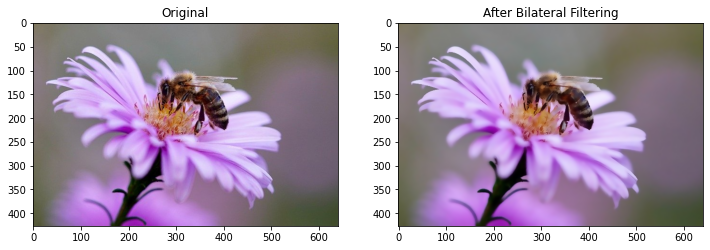

In [25]:
dst4 = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
plt.figure(figsize=(12,5))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(dst4), plt.title('After Bilateral Filtering')
plt.show()

- 종합비교

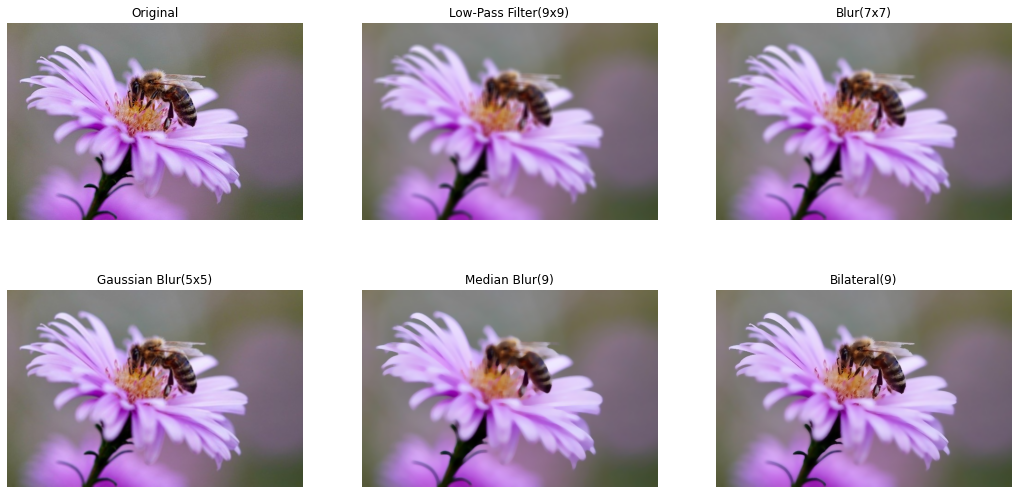

In [26]:
images = [img, dst, dst1, dst2, dst3, dst4]
titles = ['Original', 'Low-Pass Filter(9x9)', 'Blur(7x7)',
          'Gaussian Blur(5x5)', 'Median Blur(9)', 'Bilateral(9)']

plt.figure(figsize=(18,9))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.show()